# Experiment 001: *Distribution of Playlists and Number of Follower*

In [1]:
'''import standard libraries'''
import numpy as np                       # mathematical methods
from matplotlib import pyplot as plt     # plotting methods within notebook
from scipy import stats                  # lots of statistical methods
import pandas as pd
%matplobtlib inline

UsageError: Line magic function `%matplobtlib` not found.


In [2]:
import os
os.chdir('../')


from src.get_data import get_data

## Hypothesis:

The number of followers is mostly the same (only 1). But outliers have a big difference to the other playlists

Do estimate what fit we need, we made a scatter plot and histogram of the playlists.

In [26]:
dataset = get_data(True)

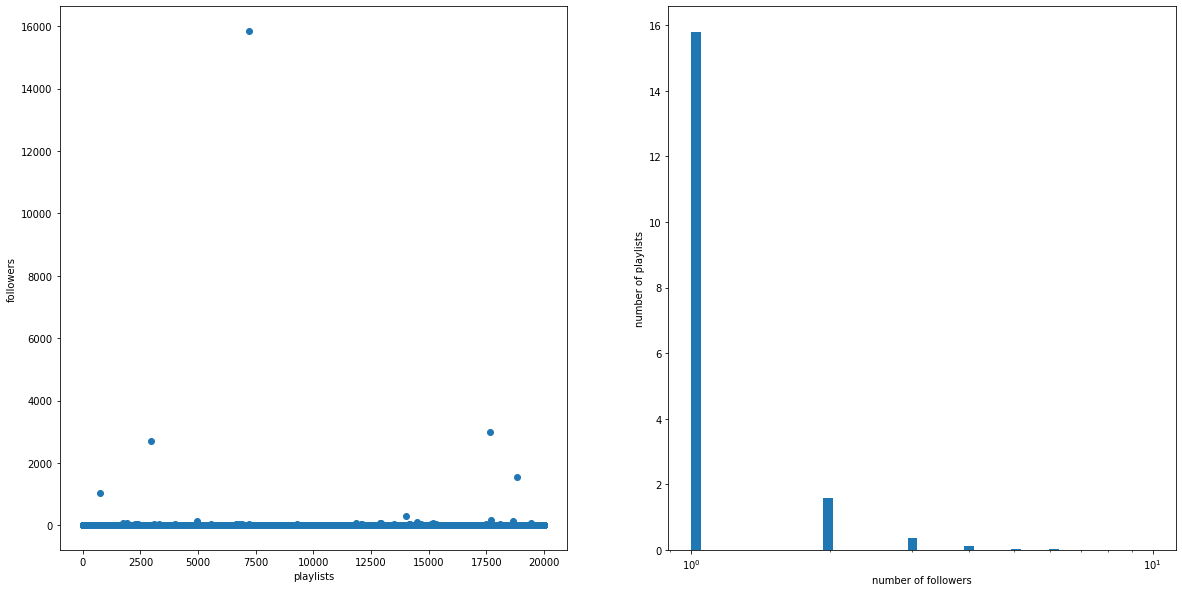

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(dataset.index, dataset.num_followers)
axs[0].set_xlabel('playlists')
axs[0].set_ylabel('followers')

axs[1].hist(dataset.num_followers, bins=np.logspace(np.log10(1),np.log10(10)), density=True)
axs[1].set_xscale("log")
axs[1].set_xlabel('number of followers')
axs[1].set_ylabel('number of playlists')
plt.show()

## Idea: 
If you sort the followers you can see a pareto (80/20) distribution?

In [15]:
#sorting data after num_followers
dataset = dataset.sort_values(by='num_followers', ascending=False)
dataset = dataset.reset_index(drop=True)

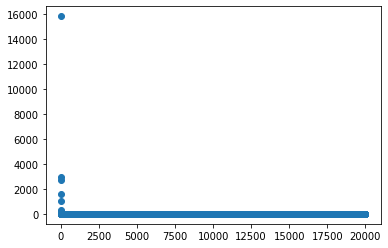

In [17]:
plt.figsize=(20, 10)

plt.scatter(dataset.index, dataset.num_followers)

Try to fit pareto distribution

/home/jonas/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


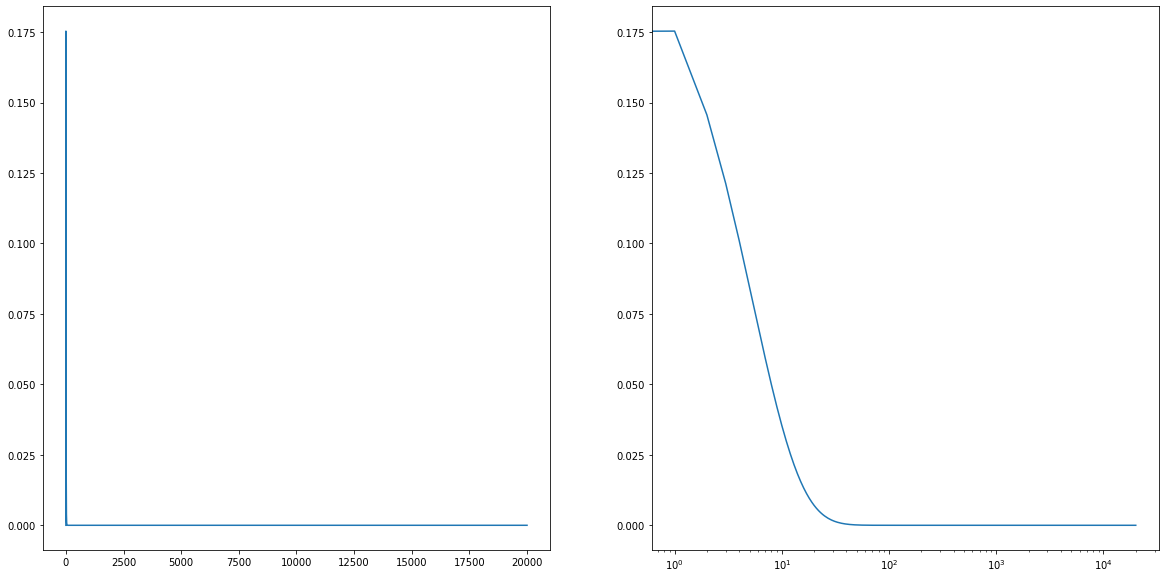

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

a,b,c = stats.pareto.fit(dataset.num_followers)
axs[0].plot(dataset.index, stats.pareto(a,b,c).pdf(dataset.index))

axs[1].plot(dataset.index, stats.pareto(a,b,c).pdf(dataset.index))
axs[1].set_xscale("log")
#plt.scatter(dataset.index, dataset.num_followers)

### Find the x best

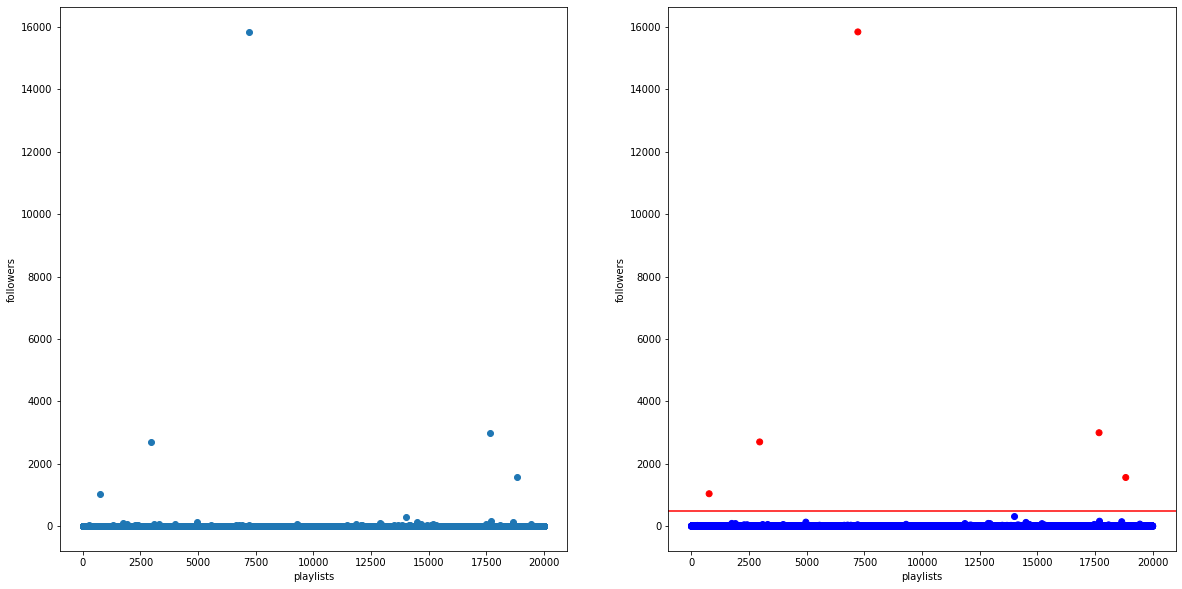

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(dataset.index, dataset.num_followers)
axs[0].set_xlabel('playlists')
axs[0].set_ylabel('followers')

border = 500

colors = np.where(dataset['num_followers']>border,'r','b')
axs[1].scatter(dataset.index, dataset.num_followers, c=colors)
axs[1].axhline(y = border, color = 'r', linestyle = '-')
axs[1].set_xlabel('playlists')
axs[1].set_ylabel('followers')
plt.show()

Text(0, 0.5, 'followers')

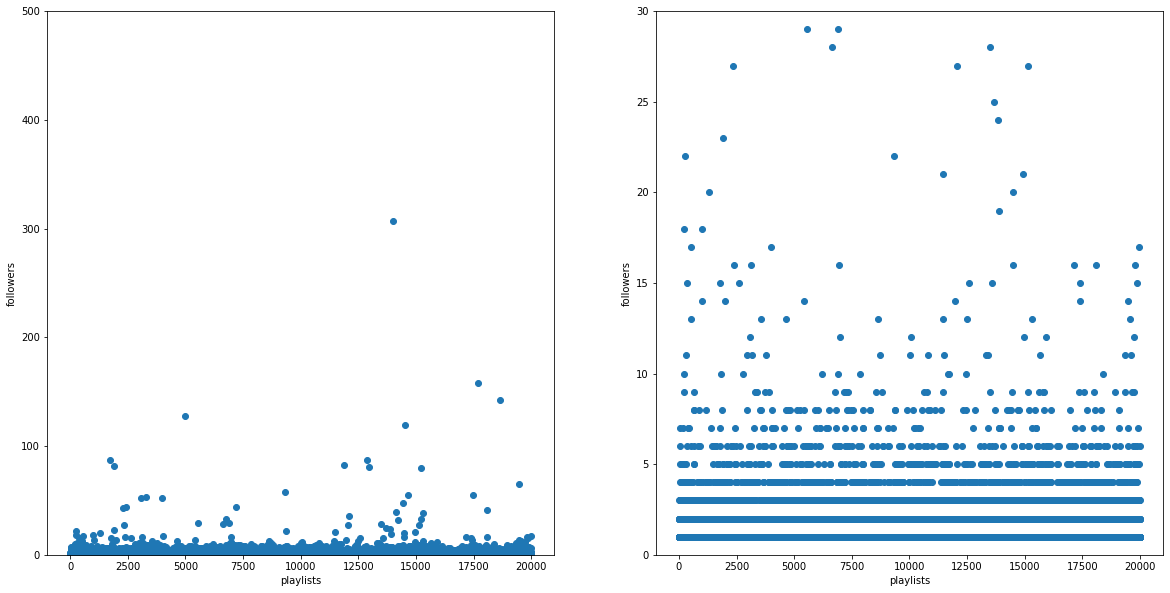

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(dataset.index, dataset.num_followers)
axs[0].set_ylim([0,border])
axs[0].set_xlabel('playlists')
axs[0].set_ylabel('followers')

axs[1].scatter(dataset.index, dataset.num_followers)
axs[1].set_ylim([0,30])
axs[1].set_xlabel('playlists')
axs[1].set_ylabel('followers')

#### Idea classification with the distance

Nicht möglich weil dafür Mittelwert der beiden Gruppen bekannt sein müsste

### Idea: classification with cumsum